In [3]:
import sys 

f = open('result2.log','r')
angle_m = []
for line in f:
    items = line.split('\t')
    angle = float(items[1])
    angle_m.append(angle)

print('angle_m: ', angle_m)



('angle_m: ', [0.26442, 0.283992, 0.316777, 0.33049, 0.308406, 0.345855, 1.94607, 0.277664, 1.833873, 0.290405, 0.304681, 0.383379, 0.300256, 0.510657, 0.209821, 0.206373, 0.342779, 0.369594, 0.669747, 0.383624, 0.4279, 0.418457, 0.730403, 0.614828, 0.661403, 0.618149, 0.531278, 0.617417, 0.767305, 0.86857, 0.85459, 0.765186, 0.853053, 0.777713, 0.885023, 0.83886, 0.964858, 1.016428, 1.024656, 0.970719, 0.864449, 0.864619, 0.816603, 1.040078, 1.080323, 1.196958, 0.945606, 0.785917, 0.830494, 0.848569, 0.915267, 1.001279, 0.926154, 1.070786, 0.910512, 1.001441, 0.923218, 0.913627, 1.134363, 0.869755, 1.007262, 1.100028, 1.128637, 1.067341, 0.945435, 0.982891, 0.9327, 1.024535, 0.795493, 0.944951, 0.786336, 0.981111, 0.830758, 1.109564, 0.886531, 1.024341, 0.894197, 0.829597, 0.863989, 0.501633, 0.346054, 0.354648, 0.220934, 0.39298, 0.221629, 0.241027, 0.813494, 0.650867, 0.681378, 0.477963, 0.506137, 0.712152, 0.736193, 0.749427, 0.72138, 0.799073, 0.761612, 0.773963, 0.899846, 0.86132

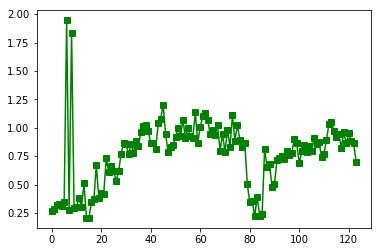

In [4]:
# plot 
import matplotlib.pyplot as plt  

plt.plot(angle_m,'gs-')
plt.show()


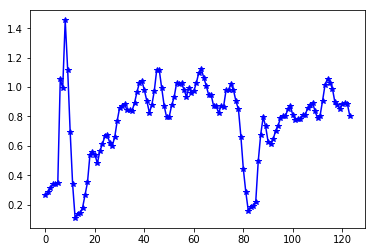

In [5]:
# smooth the output 
alpha = 0.4 

angle_sm = []
for i in range(len(angle_m)):
    if i < 3:
        angle_sm.append(angle_m[i])
    else:
        v1 = angle_sm[-1] - angle_sm[-2]
        v2 = angle_sm[-2] - angle_sm[-3]
        weight = alpha + alpha**2
        angle = (1-weight)*angle_m[i] + alpha*(angle_sm[i-1] + v1) + alpha**2 *(angle_sm[i-1]+ v2)
        angle_sm.append(angle)

plt.plot(angle_sm, 'b*-')
plt.show()


In [6]:
import numpy as np

print('mean(angle_m): {} std(angle_m): {}'.format(np.mean(angle_m), np.std(angle_m)))
print('mean(angle_sm): {} std(angle_sm): {}'.format(np.mean(angle_sm), np.std(angle_sm)))

mean(angle_m): 0.768951258065 std(angle_m): 0.290770534402
mean(angle_sm): 0.770204729434 std(angle_sm): 0.264719749907


raw_data mean: 0.725701841121, std: 1.51792368068
smooth_data mean: 0.57363873184, std: 0.642676727072


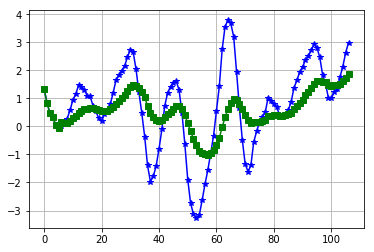

In [11]:
# 
def read_data(fname):
    f = open(fname,'r')
    angle_m = []
    for line in f:
        items = line.split('\t')
        angle = float(items[1])
        angle_m.append(angle)
    return angle_m

def smooth_data(d):
    # smooth the output 
    alpha = 0.4 

    angle_sm = []
    for i in range(len(d)):
        if i < 3:
            angle_sm.append(d[i])
        else:
            v1 = angle_sm[-1] - angle_sm[-2]
            v2 = angle_sm[-2] - angle_sm[-3]
            weight = alpha + alpha**2
            angle = (1-weight)*d[i] + alpha*(angle_sm[-1] + v1) + alpha**2 *(angle_sm[-1]+ v2)
            angle_sm.append(angle)
    return angle_sm

def filter_data(d, step = 3):
    sd = []
    for i in range(len(d)):
        sd.append(d[i])
        if i > step:
            sd[-1] = (np.mean(sd[-step:]))
    return sd

def process_pipeline(fname, step = 5):
    a1 = read_data(fname)
    # a2 = smooth_data(a1)
    
    a2 = filter_data(a1, step)
    
    print('raw_data mean: {}, std: {}'.format(np.mean(a1), np.std(a1)))
    print('smooth_data mean: {}, std: {}'.format(np.mean(a2), np.std(a2)))
    
    plt.plot(a1, 'b*-', a2, 'gs-')
    plt.grid(True)
    plt.show()
    
    

    

raw_data mean: 0.725701841121, std: 1.51792368068
smooth_data mean: 0.57363873184, std: 0.642676727072


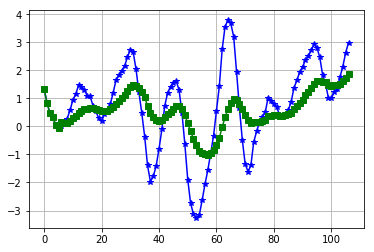

raw_data mean: 0.725701841121, std: 1.51792368068
smooth_data mean: 0.676283921159, std: 1.0792283949


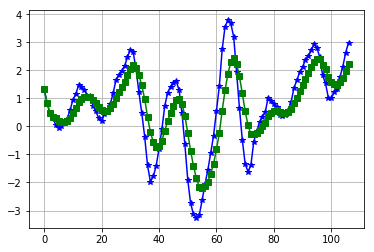

In [14]:
process_pipeline('result3.log') 
process_pipeline('result3.log', 3) 

In [28]:
a1 = read_data('result1.log')
a2 = smooth_data(a1[:10])
print('a1 = ', a1[:10])
print('a2 = ', a2)

('a1 = ', [18.102039, 13.37376, 12.893628, 11.589046, 11.759827, 12.581926, 10.137873, 8.885125, 7.802972, 7.34693])
('a2 = ', [18.102039, 13.37376, 12.893628, 11.371034479999999, 10.856244660799998, 11.166013559167999, 10.75517290140928, 9.81757858542459, 8.490379456202499, 7.306366953227013])


raw_data mean: 0.768951258065, std: 0.290770534402
smooth_data mean: 0.726402275602, std: 0.184318195326


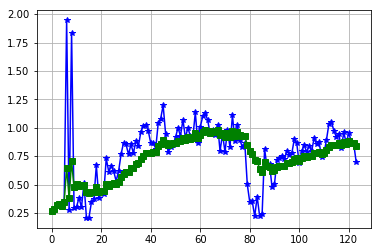

raw_data mean: 0.768951258065, std: 0.290770534402
smooth_data mean: 0.756166716348, std: 0.211043834042


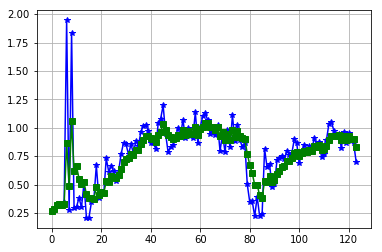

In [12]:
process_pipeline('result2.log', 5) 
process_pipeline('result2.log', 3) 

raw_data mean: 1.96548129582, std: 14.6429174554
smooth_data mean: 2.06292778829, std: 10.3508335471


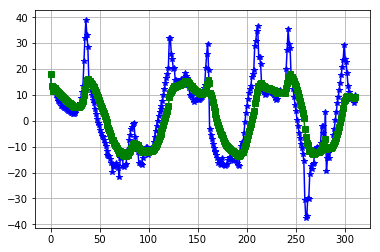

raw_data mean: 1.96548129582, std: 14.6429174554
smooth_data mean: 1.98283211369, std: 13.2612787734


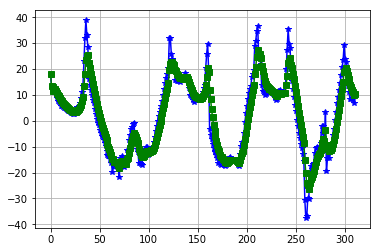

In [13]:
process_pipeline('result1.log', 5) 
process_pipeline('result1.log', 3) 